# Dear American scientists, the Puget Sound is not a synonym for the Salish Sea and should not be treated as such.

From EPA:
https://www.epa.gov/puget-sound/about-epas-work-puget-sound#:~:text=There%20is%20no%20boundary%20that,Strait%20of%20Juan%20de%20Fuca.

There is no boundary that officially defines Puget Sound, but for regulatory purposes we refer to it as the marine areas south of the U.S.-Canada border and east of the Strait of Juan de Fuca.

## non-PS is 2, PS is 1

Wikipedia also has the 5 main basins coloured - I made sure they were included in my mask


## Answer - this gives me <9%, for R1 I shall say <10%


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import matplotlib.pyplot as plt
import pickle

import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import cmocean as cm
import glob
import sys
import gsw
%matplotlib inline
from salishsea_tools import grid_tools, viz_tools
from statsmodels.stats.weightstats import DescrStatsW
from math import log10, floor

(40, 898, 398)


Text(0.5, 1.0, 'regional mask')

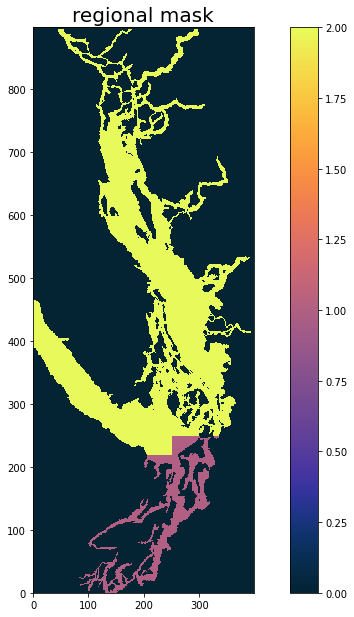

In [15]:
tm = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = tm.variables['tmask'][0, 0, :, :]
mask_depth = tm.variables['tmask'][0, :, :, :]
print(np.shape(mask_depth))
mask = np.zeros_like(tmask)
mask[tmask>0] = 2

for y in range(0,898):
    for x in range(0,398):
        
#         if  (x <185) & (y>220) & (y<500) & (tmask[y,x] >0) :
#             mask[y,x] = 1
        if (y<220) & (tmask[y,x] >0) :
                mask[y,x] = 1
        if (x>250) & (y<250) & (tmask[y,x] >0) :
                mask[y,x] = 1
        
#         if  (y >= 630) & (tmask[y,x] > 0): #changed from 550
#             mask[y,x] = 2
#         if (x> 185) & (y>320) & (y<630) & (tmask[y,x]>0):
#             mask[y,x] = 3
#         if (y>500) & (y<650) & (tmask[y,x]>0):
#             mask[y,x] = 3

mask[mask == 4] = 2
pickle.dump(mask, open("reg_mask.pkl", 'wb'))


reg_mask = pickle.load(open('./reg_mask.pkl', 'rb'))  

fact = 0.65
fig, ax = plt.subplots(1, 1, figsize=(20*fact, 16*fact))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(reg_mask, cmap=cm.cm.thermal)
fig.colorbar(mesh)
plt.title('regional mask',fontsize=20)

In [24]:
csize  = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))  
print(np.shape(csize))
reg_mask_vol = np.zeros([40,898,398])

for i in range(0,40):
    
    reg_mask_vol[i,:,:] = reg_mask
    
reg_mask_all_ss = np.copy(reg_mask_vol)

(40, 898, 398)


In [20]:
print(tm['e3t_0'][0,0,250,250])
print(tm['e1t'][0,250,250])
print(tm['e2t'][0,250,250])

print((tm['e3t_0'][0,0,250,250])*
(tm['e1t'][0,250,250])*
(tm['e2t'][0,250,250]))
print(csize[0,250,250])

print(csi)

1.0000011545549246
440.54666691637465
504.8133000202094
222394.0735048354
222394.0735048354


In [31]:
#total volume in m3 of the model domain
print('volume of model domanin in cubin kilometers')
print(np.nansum(csize)*1e-9)
print('volume of non-puget-sound in cubic kilometers')
print(np.nansum(csize[reg_mask_vol==2])*1e-9)
print('volume of puget sound in cubic kilometers')
print(np.nansum(csize[reg_mask_vol==1])*1e-9)
print('what percent of the model domain is puget sound')
print((np.nansum(csize[reg_mask_vol==1])*1e-9)/(np.nansum(csize[reg_mask_vol==2])*1e-9)*100)

volume of model domanin in cubin kilometers
2276.9183288408403
volume of non-puget-sound in cubic kilometers
2091.117303646216
volume of puget sound in cubic kilometers
185.8010251946245
what percent of the model domain is puget sound
8.885251194213211
